# Investigate enron email
# Load Libraries

http://localhost:8888/tree/network-analysis-helpers-master

In [2]:
# For reading, and transforming data
import pandas as pd 

# For creating network graphs 
import networkx as nx

# To use shortest path and clique-finding algorithms 
from networkx.algorithms import approximation

# For basic mathematical calculations
import math 

# For visualising our networks
import matplotlib.pyplot as plt

# Specifically, for interactive visualisations
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
from plotly.offline import plot as offpy

# Load and Check the data

In [4]:
enron.head()

,from,to
0,greg.whalley,k..allen
1,louise.kitchen,k..allen
2,louise.kitchen,k..allen
3,errol.mclaughlin,john.arnold
4,mike.grigsby,john.arnold


In [22]:
# use network to create a graph object

g = nx.from_pandas_edgelist(df=enron, source='from', target='to',create_using= nx.DiGraph() )
#g = nx.from_pandas_edgelist(df=enron, source='from', target='to')

In [23]:
g

# Exploring Graph properties

Lets explore some of the function in netwrok for studying graph

In [24]:
# look at the nodes
g.nodes()

NodeView(('greg.whalley', 'k..allen', 'louise.kitchen', 'errol.mclaughlin', 'john.arnold', 'mike.grigsby', 'john.griffith', 'dutch.quigley', 's..shively', 'richard.shapiro', 'harry.arora', 'sally.beck', 'matthew.lenhart', 'eric.bass', 'a..martin', 'm..love', 'monique.sanchez', 'charles.weldon', 'jeff.king', 'don.baughman', 'w..delainey', 'w..white', 'rod.hayslett', 'rick.buy', 'm..presto', 'robert.benson', 'dana.davis', 'joe.quenet', 'susan.scott', 'michelle.lokay', 'lynn.blair', 'lindy.donoho', 'shelley.corman', 'kimberly.watson', 'bill.rapp', 'scott.neal', 'f..brawner', 'jim.schwieger', 'vladi.pimenov', 'andrea.ring', 'l..mims', 'j.kaminski', 'j..kean', 'a..shankman', 'stanley.horton', 'kenneth.lay', 'f..campbell', 'joe.stepenovitch', 'd..thomas', 'mike.carson', 'eric.saibi', 'j..sturm', 'michelle.cash', 'teb.lokey', 'tracy.geaccone', 'kevin.hyatt', 'darrell.schoolcraft', 'd..steffes', 'cara.semperger', 'sean.crandall', 'cooper.richey', 'diana.scholtes', 'stephanie.panus', 'matt.motl

In [25]:
g.edges()

OutEdgeView([('greg.whalley', 'k..allen'), ('greg.whalley', 'rick.buy'), ('k..allen', 'keith.holst'), ('k..allen', 'kam.keiser'), ('k..allen', 'lavorato'), ('k..allen', 'h..lewis'), ('k..allen', 'a..martin'), ('k..allen', 'scott.neal'), ('k..allen', 'dutch.quigley'), ('k..allen', 'greg.whalley'), ('louise.kitchen', 'k..allen'), ('louise.kitchen', 'john.arnold'), ('louise.kitchen', 'harry.arora'), ('louise.kitchen', 'sally.beck'), ('louise.kitchen', 'robert.benson'), ('louise.kitchen', 'f..brawner'), ('louise.kitchen', 'rick.buy'), ('louise.kitchen', 'mike.carson'), ('louise.kitchen', 'doug.gilbert-smith'), ('louise.kitchen', 'mike.grigsby'), ('louise.kitchen', 'e..haedicke'), ('louise.kitchen', 'lavorato'), ('louise.kitchen', 'a..martin'), ('louise.kitchen', 'larry.may'), ('louise.kitchen', 'l..mims'), ('louise.kitchen', 'scott.neal'), ('louise.kitchen', 'gerald.nemec'), ('louise.kitchen', 'm..presto'), ('louise.kitchen', 'elizabeth.sager'), ('louise.kitchen', 'sara.shackleton'), ('lou

In [26]:
# turn this into a list for
list(g.nodes())

['greg.whalley',
 'k..allen',
 'louise.kitchen',
 'errol.mclaughlin',
 'john.arnold',
 'mike.grigsby',
 'john.griffith',
 'dutch.quigley',
 's..shively',
 'richard.shapiro',
 'harry.arora',
 'sally.beck',
 'matthew.lenhart',
 'eric.bass',
 'a..martin',
 'm..love',
 'monique.sanchez',
 'charles.weldon',
 'jeff.king',
 'don.baughman',
 'w..delainey',
 'w..white',
 'rod.hayslett',
 'rick.buy',
 'm..presto',
 'robert.benson',
 'dana.davis',
 'joe.quenet',
 'susan.scott',
 'michelle.lokay',
 'lynn.blair',
 'lindy.donoho',
 'shelley.corman',
 'kimberly.watson',
 'bill.rapp',
 'scott.neal',
 'f..brawner',
 'jim.schwieger',
 'vladi.pimenov',
 'andrea.ring',
 'l..mims',
 'j.kaminski',
 'j..kean',
 'a..shankman',
 'stanley.horton',
 'kenneth.lay',
 'f..campbell',
 'joe.stepenovitch',
 'd..thomas',
 'mike.carson',
 'eric.saibi',
 'j..sturm',
 'michelle.cash',
 'teb.lokey',
 'tracy.geaccone',
 'kevin.hyatt',
 'darrell.schoolcraft',
 'd..steffes',
 'cara.semperger',
 'sean.crandall',
 'cooper.riche

In [27]:
list(g.edges())

[('greg.whalley', 'k..allen'),
 ('greg.whalley', 'rick.buy'),
 ('k..allen', 'keith.holst'),
 ('k..allen', 'kam.keiser'),
 ('k..allen', 'lavorato'),
 ('k..allen', 'h..lewis'),
 ('k..allen', 'a..martin'),
 ('k..allen', 'scott.neal'),
 ('k..allen', 'dutch.quigley'),
 ('k..allen', 'greg.whalley'),
 ('louise.kitchen', 'k..allen'),
 ('louise.kitchen', 'john.arnold'),
 ('louise.kitchen', 'harry.arora'),
 ('louise.kitchen', 'sally.beck'),
 ('louise.kitchen', 'robert.benson'),
 ('louise.kitchen', 'f..brawner'),
 ('louise.kitchen', 'rick.buy'),
 ('louise.kitchen', 'mike.carson'),
 ('louise.kitchen', 'doug.gilbert-smith'),
 ('louise.kitchen', 'mike.grigsby'),
 ('louise.kitchen', 'e..haedicke'),
 ('louise.kitchen', 'lavorato'),
 ('louise.kitchen', 'a..martin'),
 ('louise.kitchen', 'larry.may'),
 ('louise.kitchen', 'l..mims'),
 ('louise.kitchen', 'scott.neal'),
 ('louise.kitchen', 'gerald.nemec'),
 ('louise.kitchen', 'm..presto'),
 ('louise.kitchen', 'elizabeth.sager'),
 ('louise.kitchen', 'sara.sh

In [28]:
# confirm if directed 
nx.is_directed(g)

True

In [29]:
# is weighted
nx.is_weighted(g)

False

In [30]:
# lets find degree of eahc node.. how many email send to or rcvd from each person

list(g.degree())

[('greg.whalley', 18),
 ('k..allen', 10),
 ('louise.kitchen', 31),
 ('errol.mclaughlin', 11),
 ('john.arnold', 14),
 ('mike.grigsby', 28),
 ('john.griffith', 8),
 ('dutch.quigley', 10),
 ('s..shively', 16),
 ('richard.shapiro', 10),
 ('harry.arora', 5),
 ('sally.beck', 23),
 ('matthew.lenhart', 9),
 ('eric.bass', 11),
 ('a..martin', 20),
 ('m..love', 12),
 ('monique.sanchez', 14),
 ('charles.weldon', 6),
 ('jeff.king', 3),
 ('don.baughman', 6),
 ('w..delainey', 6),
 ('w..white', 14),
 ('rod.hayslett', 17),
 ('rick.buy', 14),
 ('m..presto', 13),
 ('robert.benson', 6),
 ('dana.davis', 3),
 ('joe.quenet', 1),
 ('susan.scott', 13),
 ('michelle.lokay', 16),
 ('lynn.blair', 13),
 ('lindy.donoho', 22),
 ('shelley.corman', 18),
 ('kimberly.watson', 21),
 ('bill.rapp', 14),
 ('scott.neal', 20),
 ('f..brawner', 8),
 ('jim.schwieger', 7),
 ('vladi.pimenov', 9),
 ('andrea.ring', 2),
 ('l..mims', 7),
 ('j.kaminski', 4),
 ('j..kean', 11),
 ('a..shankman', 6),
 ('stanley.horton', 11),
 ('kenneth.lay'

In [31]:
# dehgre of incoming emial
list(g.in_degree())

[('greg.whalley', 16),
 ('k..allen', 2),
 ('louise.kitchen', 2),
 ('errol.mclaughlin', 5),
 ('john.arnold', 6),
 ('mike.grigsby', 6),
 ('john.griffith', 0),
 ('dutch.quigley', 6),
 ('s..shively', 8),
 ('richard.shapiro', 2),
 ('harry.arora', 3),
 ('sally.beck', 5),
 ('matthew.lenhart', 1),
 ('eric.bass', 5),
 ('a..martin', 16),
 ('m..love', 3),
 ('monique.sanchez', 3),
 ('charles.weldon', 2),
 ('jeff.king', 1),
 ('don.baughman', 1),
 ('w..delainey', 1),
 ('w..white', 6),
 ('rod.hayslett', 7),
 ('rick.buy', 10),
 ('m..presto', 1),
 ('robert.benson', 6),
 ('dana.davis', 0),
 ('joe.quenet', 0),
 ('susan.scott', 8),
 ('michelle.lokay', 5),
 ('lynn.blair', 5),
 ('lindy.donoho', 14),
 ('shelley.corman', 11),
 ('kimberly.watson', 11),
 ('bill.rapp', 8),
 ('scott.neal', 10),
 ('f..brawner', 6),
 ('jim.schwieger', 0),
 ('vladi.pimenov', 7),
 ('andrea.ring', 1),
 ('l..mims', 4),
 ('j.kaminski', 1),
 ('j..kean', 3),
 ('a..shankman', 0),
 ('stanley.horton', 2),
 ('kenneth.lay', 14),
 ('f..campbell

In [32]:
# dehgre of outgoing emial
list(g.out_degree())

[('greg.whalley', 2),
 ('k..allen', 8),
 ('louise.kitchen', 29),
 ('errol.mclaughlin', 6),
 ('john.arnold', 8),
 ('mike.grigsby', 22),
 ('john.griffith', 8),
 ('dutch.quigley', 4),
 ('s..shively', 8),
 ('richard.shapiro', 8),
 ('harry.arora', 2),
 ('sally.beck', 18),
 ('matthew.lenhart', 8),
 ('eric.bass', 6),
 ('a..martin', 4),
 ('m..love', 9),
 ('monique.sanchez', 11),
 ('charles.weldon', 4),
 ('jeff.king', 2),
 ('don.baughman', 5),
 ('w..delainey', 5),
 ('w..white', 8),
 ('rod.hayslett', 10),
 ('rick.buy', 4),
 ('m..presto', 12),
 ('robert.benson', 0),
 ('dana.davis', 3),
 ('joe.quenet', 1),
 ('susan.scott', 5),
 ('michelle.lokay', 11),
 ('lynn.blair', 8),
 ('lindy.donoho', 8),
 ('shelley.corman', 7),
 ('kimberly.watson', 10),
 ('bill.rapp', 6),
 ('scott.neal', 10),
 ('f..brawner', 2),
 ('jim.schwieger', 7),
 ('vladi.pimenov', 2),
 ('andrea.ring', 1),
 ('l..mims', 3),
 ('j.kaminski', 3),
 ('j..kean', 8),
 ('a..shankman', 6),
 ('stanley.horton', 9),
 ('kenneth.lay', 5),
 ('f..campbel

In [38]:
# we can search for sopecific edges betwen specific nodes
g.number_of_edges('greg.whalley', 'k..allen')


1

In [37]:
g.number_of_edges('k..allen','greg.whalley')

1

In [42]:
# we can focus  on one operson and see who they sent or rcvd email
list(g.successors('greg.whalley'))

['k..allen', 'rick.buy']

In [43]:
list(g.predecessors('greg.whalley'))

['richard.shapiro',
 'stanley.horton',
 'j.kaminski',
 'louise.kitchen',
 'j..kean',
 'kenneth.lay',
 'w..delainey',
 'sally.beck',
 'andy.zipper',
 'rick.buy',
 'a..shankman',
 'h..lewis',
 'tom.donohoe',
 'jim.schwieger',
 'k..allen',
 'james.derrick']

# Shortest Paths , cliques, centrality measures etc.


In [48]:
# ' lets find shortets path'

nx.shortest_path(g , source='greg.whalley', target='kenneth.lay')

['greg.whalley', 'rick.buy', 'kenneth.lay']

In [52]:
# shortets path to a given nodes from all other starting node
nx.shortest_path(g ,  target='kenneth.lay')
#nx.all_shortest_paths(g ,  target='kenneth.lay')

{'kenneth.lay': ['kenneth.lay'],
 'james.derrick': ['james.derrick', 'kenneth.lay'],
 'stanley.horton': ['stanley.horton', 'kenneth.lay'],
 'j..kean': ['j..kean', 'kenneth.lay'],
 'tom.donohoe': ['tom.donohoe', 'kenneth.lay'],
 'w..pereira': ['w..pereira', 'kenneth.lay'],
 'richard.shapiro': ['richard.shapiro', 'kenneth.lay'],
 'rick.buy': ['rick.buy', 'kenneth.lay'],
 'a..shankman': ['a..shankman', 'kenneth.lay'],
 'kevin.hyatt': ['kevin.hyatt', 'kenneth.lay'],
 'jim.schwieger': ['jim.schwieger', 'kenneth.lay'],
 'sally.beck': ['sally.beck', 'kenneth.lay'],
 'benjamin.rogers': ['benjamin.rogers', 'kenneth.lay'],
 'danny.mccarty': ['danny.mccarty', 'kenneth.lay'],
 'w..delainey': ['w..delainey', 'kenneth.lay'],
 'michelle.cash': ['michelle.cash', 'james.derrick', 'kenneth.lay'],
 'rod.hayslett': ['rod.hayslett', 'stanley.horton', 'kenneth.lay'],
 'lynn.blair': ['lynn.blair', 'stanley.horton', 'kenneth.lay'],
 'jeff.dasovich': ['jeff.dasovich', 'j..kean', 'kenneth.lay'],
 'chris.germany

In [53]:
# we can find degree of centrality.. how many nodes directly connected to divided by number of connection
nx.degree_centrality(g)


{'greg.whalley': 0.13846153846153847,
 'k..allen': 0.07692307692307693,
 'louise.kitchen': 0.23846153846153847,
 'errol.mclaughlin': 0.08461538461538462,
 'john.arnold': 0.1076923076923077,
 'mike.grigsby': 0.2153846153846154,
 'john.griffith': 0.06153846153846154,
 'dutch.quigley': 0.07692307692307693,
 's..shively': 0.12307692307692308,
 'richard.shapiro': 0.07692307692307693,
 'harry.arora': 0.038461538461538464,
 'sally.beck': 0.17692307692307693,
 'matthew.lenhart': 0.06923076923076923,
 'eric.bass': 0.08461538461538462,
 'a..martin': 0.15384615384615385,
 'm..love': 0.09230769230769231,
 'monique.sanchez': 0.1076923076923077,
 'charles.weldon': 0.046153846153846156,
 'jeff.king': 0.023076923076923078,
 'don.baughman': 0.046153846153846156,
 'w..delainey': 0.046153846153846156,
 'w..white': 0.1076923076923077,
 'rod.hayslett': 0.13076923076923078,
 'rick.buy': 0.1076923076923077,
 'm..presto': 0.1,
 'robert.benson': 0.046153846153846156,
 'dana.davis': 0.023076923076923078,
 'joe.

In [58]:
# sort

enron_dc = nx.degree_centrality(g)
sorted(enron_dc.items(), key=lambda x: x[1], reverse=True)


[('louise.kitchen', 0.23846153846153847),
 ('mike.grigsby', 0.2153846153846154),
 ('kam.keiser', 0.2076923076923077),
 ('sally.beck', 0.17692307692307693),
 ('lindy.donoho', 0.16923076923076924),
 ('kimberly.watson', 0.16153846153846155),
 ('gerald.nemec', 0.16153846153846155),
 ('a..martin', 0.15384615384615385),
 ('scott.neal', 0.15384615384615385),
 ('kenneth.lay', 0.14615384615384616),
 ('lavorato', 0.14615384615384616),
 ('greg.whalley', 0.13846153846153847),
 ('shelley.corman', 0.13846153846153847),
 ('rod.hayslett', 0.13076923076923078),
 ('john.hodge', 0.13076923076923078),
 ('s..shively', 0.12307692307692308),
 ('michelle.lokay', 0.12307692307692308),
 ('stephanie.panus', 0.12307692307692308),
 ('andy.zipper', 0.12307692307692308),
 ('teb.lokey', 0.11538461538461539),
 ('doug.gilbert-smith', 0.11538461538461539),
 ('jay.reitmeyer', 0.11538461538461539),
 ('sara.shackleton', 0.11538461538461539),
 ('john.arnold', 0.1076923076923077),
 ('monique.sanchez', 0.1076923076923077),
 (

In [59]:
nx.betweenness_centrality(g)

{'greg.whalley': 0.0428123827538389,
 'k..allen': 0.023333275913776805,
 'louise.kitchen': 0.037618216628066636,
 'errol.mclaughlin': 0.023897142743296587,
 'john.arnold': 0.011336949011367616,
 'mike.grigsby': 0.08357457510792202,
 'john.griffith': 0.0,
 'dutch.quigley': 0.01733314358695817,
 's..shively': 0.022325325161839396,
 'richard.shapiro': 0.0061151452072740085,
 'harry.arora': 0.0035523604799096767,
 'sally.beck': 0.11891229150439925,
 'matthew.lenhart': 0.0003538550497405596,
 'eric.bass': 0.03501994163815639,
 'a..martin': 0.045218671150039094,
 'm..love': 0.022745404139627237,
 'monique.sanchez': 0.007979007674893185,
 'charles.weldon': 0.0013905216230797627,
 'jeff.king': 0.007052275889485191,
 'don.baughman': 0.001148876962830451,
 'w..delainey': 0.01916126724266259,
 'w..white': 0.05747749719505868,
 'rod.hayslett': 0.05048431104694472,
 'rick.buy': 0.039135776305423566,
 'm..presto': 0.0009652993899796852,
 'robert.benson': 0.0,
 'dana.davis': 0.0,
 'joe.quenet': 0.0,


In [60]:
nx.eigenvector_centrality(g)

{'greg.whalley': 0.03091903378599063,
 'k..allen': 0.005364228599776185,
 'louise.kitchen': 0.005086344987771196,
 'errol.mclaughlin': 0.0034935226834277677,
 'john.arnold': 0.0041723373291970255,
 'mike.grigsby': 0.0074216998380423034,
 'john.griffith': 1.4900241810625916e-31,
 'dutch.quigley': 0.0028683961653446647,
 's..shively': 0.009128320578303342,
 'richard.shapiro': 0.0012231078983554438,
 'harry.arora': 0.00591351283690085,
 'sally.beck': 0.03338358636133063,
 'matthew.lenhart': 0.0011059860990820802,
 'eric.bass': 0.003680171931131725,
 'a..martin': 0.017422430971664463,
 'm..love': 0.0024778630768450905,
 'monique.sanchez': 0.0018569047203935403,
 'charles.weldon': 0.0018315565837054343,
 'jeff.king': 0.0004316622994654698,
 'don.baughman': 6.433443490972477e-05,
 'w..delainey': 0.0007984986911700113,
 'w..white': 0.008611527045224353,
 'rod.hayslett': 0.1811749175860459,
 'rick.buy': 0.02841197314012276,
 'm..presto': 0.0007577625532725664,
 'robert.benson': 0.0028925675362

In [61]:
nx.in_degree_centrality(g)

{'greg.whalley': 0.12307692307692308,
 'k..allen': 0.015384615384615385,
 'louise.kitchen': 0.015384615384615385,
 'errol.mclaughlin': 0.038461538461538464,
 'john.arnold': 0.046153846153846156,
 'mike.grigsby': 0.046153846153846156,
 'john.griffith': 0.0,
 'dutch.quigley': 0.046153846153846156,
 's..shively': 0.06153846153846154,
 'richard.shapiro': 0.015384615384615385,
 'harry.arora': 0.023076923076923078,
 'sally.beck': 0.038461538461538464,
 'matthew.lenhart': 0.007692307692307693,
 'eric.bass': 0.038461538461538464,
 'a..martin': 0.12307692307692308,
 'm..love': 0.023076923076923078,
 'monique.sanchez': 0.023076923076923078,
 'charles.weldon': 0.015384615384615385,
 'jeff.king': 0.007692307692307693,
 'don.baughman': 0.007692307692307693,
 'w..delainey': 0.007692307692307693,
 'w..white': 0.046153846153846156,
 'rod.hayslett': 0.05384615384615385,
 'rick.buy': 0.07692307692307693,
 'm..presto': 0.007692307692307693,
 'robert.benson': 0.046153846153846156,
 'dana.davis': 0.0,
 'jo

In [62]:
# we could look at  density.  i.e no of connections over total no of possible connections
nx.density(g)


0.037345860246623605

ABout 4% of possible connections that could exist for nodes actually exists
hence it is not a complete network

In [66]:
# lets find a  clique i.e a maximal complete subgraph
approximation.clique.max_clique(g)

{'elizabeth.sager',
 'legal <.taylor@',
 'marie.heard',
 'sara.shackleton',
 'stephanie.panus'}

# Visualizing the enron network

In [67]:
# Create a dataframe of the graph nodes  
names_df = pd.DataFrame(list(g.nodes()), columns=['Name'])

# Map it to a dictionary
names_map = names_df['Name'].to_dict()

names_map

{0: 'greg.whalley',
 1: 'k..allen',
 2: 'louise.kitchen',
 3: 'errol.mclaughlin',
 4: 'john.arnold',
 5: 'mike.grigsby',
 6: 'john.griffith',
 7: 'dutch.quigley',
 8: 's..shively',
 9: 'richard.shapiro',
 10: 'harry.arora',
 11: 'sally.beck',
 12: 'matthew.lenhart',
 13: 'eric.bass',
 14: 'a..martin',
 15: 'm..love',
 16: 'monique.sanchez',
 17: 'charles.weldon',
 18: 'jeff.king',
 19: 'don.baughman',
 20: 'w..delainey',
 21: 'w..white',
 22: 'rod.hayslett',
 23: 'rick.buy',
 24: 'm..presto',
 25: 'robert.benson',
 26: 'dana.davis',
 27: 'joe.quenet',
 28: 'susan.scott',
 29: 'michelle.lokay',
 30: 'lynn.blair',
 31: 'lindy.donoho',
 32: 'shelley.corman',
 33: 'kimberly.watson',
 34: 'bill.rapp',
 35: 'scott.neal',
 36: 'f..brawner',
 37: 'jim.schwieger',
 38: 'vladi.pimenov',
 39: 'andrea.ring',
 40: 'l..mims',
 41: 'j.kaminski',
 42: 'j..kean',
 43: 'a..shankman',
 44: 'stanley.horton',
 45: 'kenneth.lay',
 46: 'f..campbell',
 47: 'joe.stepenovitch',
 48: 'd..thomas',
 49: 'mike.cars

In [68]:
# Create a list of edges - but now with numbers instead of names. We map the names to the numbers using the names_map
# dictionary.

index_tuples = []

for i in range(len(list(g.edges()))):
    index_tuples.append((list(names_map.values()).index(list(g.edges())[i][0]), 
                         list(names_map.values()).index(list(g.edges())[i][1])))
    
    
index_tuples

[(0, 1),
 (0, 23),
 (1, 107),
 (1, 82),
 (1, 111),
 (1, 115),
 (1, 14),
 (1, 35),
 (1, 7),
 (1, 0),
 (2, 1),
 (2, 4),
 (2, 10),
 (2, 11),
 (2, 25),
 (2, 36),
 (2, 23),
 (2, 49),
 (2, 72),
 (2, 5),
 (2, 95),
 (2, 111),
 (2, 14),
 (2, 118),
 (2, 40),
 (2, 35),
 (2, 97),
 (2, 24),
 (2, 102),
 (2, 99),
 (2, 8),
 (2, 57),
 (2, 128),
 (2, 108),
 (2, 96),
 (2, 65),
 (2, 0),
 (2, 21),
 (2, 120),
 (3, 4),
 (3, 82),
 (3, 117),
 (3, 118),
 (3, 7),
 (3, 120),
 (4, 109),
 (4, 111),
 (4, 117),
 (4, 118),
 (4, 3),
 (4, 7),
 (4, 129),
 (4, 120),
 (5, 4),
 (5, 81),
 (5, 86),
 (5, 92),
 (5, 107),
 (5, 82),
 (5, 110),
 (5, 111),
 (5, 12),
 (5, 14),
 (5, 63),
 (5, 38),
 (5, 84),
 (5, 16),
 (5, 28),
 (5, 8),
 (5, 127),
 (5, 51),
 (5, 108),
 (5, 65),
 (5, 129),
 (5, 85),
 (6, 4),
 (6, 109),
 (6, 117),
 (6, 118),
 (6, 103),
 (6, 38),
 (6, 7),
 (6, 120),
 (7, 4),
 (7, 117),
 (7, 3),
 (7, 28),
 (8, 4),
 (8, 94),
 (8, 92),
 (8, 111),
 (8, 14),
 (8, 40),
 (8, 35),
 (8, 128),
 (9, 10),
 (9, 64),
 (9, 42),
 (9, 11

In [71]:
# Lets visualize the network
# assign 3d cooridnates (x,y,z) to eaxh of our nodes using sprin layour algorith
positions=nx.spring_layout(g, dim=3, seed=123)
positions

{'greg.whalley': array([ 0.1835852 , -0.08386077, -0.0193002 ]),
 'k..allen': array([ 0.26738853, -0.06952478, -0.03475717]),
 'louise.kitchen': array([ 0.01443084,  0.00304238, -0.01601759]),
 'errol.mclaughlin': array([ 0.13614421, -0.09640792,  0.01123306]),
 'john.arnold': array([ 0.20408164, -0.02602757,  0.04363202]),
 'mike.grigsby': array([ 0.1195202 ,  0.09839607, -0.00693157]),
 'john.griffith': array([ 0.14124665, -0.20677986,  0.22358659]),
 'dutch.quigley': array([-0.00020456, -0.0713716 , -0.05932842]),
 's..shively': array([ 0.24883653, -0.26410741,  0.06916514]),
 'richard.shapiro': array([ 0.26057542, -0.16993544, -0.12921246]),
 'harry.arora': array([ 0.13028926, -0.0917526 , -0.02006339]),
 'sally.beck': array([-0.07594141, -0.0464921 ,  0.09509709]),
 'matthew.lenhart': array([0.14105261, 0.17915181, 0.08976593]),
 'eric.bass': array([ 0.14657137, -0.01562585,  0.03570792]),
 'a..martin': array([ 2.44352783e-01, -1.04251219e-01,  4.69336312e-05]),
 'm..love': array(

In [72]:
pos_list =  list(positions.values())

In [73]:
pos_list

[array([ 0.1835852 , -0.08386077, -0.0193002 ]),
 array([ 0.26738853, -0.06952478, -0.03475717]),
 array([ 0.01443084,  0.00304238, -0.01601759]),
 array([ 0.13614421, -0.09640792,  0.01123306]),
 array([ 0.20408164, -0.02602757,  0.04363202]),
 array([ 0.1195202 ,  0.09839607, -0.00693157]),
 array([ 0.14124665, -0.20677986,  0.22358659]),
 array([-0.00020456, -0.0713716 , -0.05932842]),
 array([ 0.24883653, -0.26410741,  0.06916514]),
 array([ 0.26057542, -0.16993544, -0.12921246]),
 array([ 0.13028926, -0.0917526 , -0.02006339]),
 array([-0.07594141, -0.0464921 ,  0.09509709]),
 array([0.14105261, 0.17915181, 0.08976593]),
 array([ 0.14657137, -0.01562585,  0.03570792]),
 array([ 2.44352783e-01, -1.04251219e-01,  4.69336312e-05]),
 array([ 0.13521692, -0.19275685,  0.08594975]),
 array([ 0.07431334, -0.01805303,  0.20651684]),
 array([0.20890073, 0.14649135, 0.21077927]),
 array([-0.33950796,  0.11574756,  0.05313272]),
 array([-0.35509882, -0.03377286,  0.03625846]),
 array([ 0.225

In [75]:
# lets set some node attribute so that we can refer to them later in plotly
nx.set_node_attributes(g, nx.degree_centrality(g), 'Degree Centrality' )
nx.set_node_attributes(g, nx.betweenness_centrality(g), 'Betweenness Centrality' )

nx.set_node_attributes(g, nx.eigenvector_centrality(g), 'Eigenvector Centrality' )
nx.set_node_attributes(g, nx.in_degree_centrality(g), 'In-Degree Centrality' )

# Lets Plot

In [76]:
# Number of nodes
N2=len(g.nodes())

# Number of edges
L2=len(g.edges())

# Setting coordinates of the nodes based on the values from the pos_list we created earlier
Xn=[pos_list[k][0] for k in range(N2)]# x-coordinates 
Yn=[pos_list[k][1] for k in range(N2)]# y-coordinates
Zn=[pos_list[k][2] for k in range(N2)]# z-coordinates

# Setting coordinates of edge beginnings and ends
Xe=[]
Ye=[]
Ze=[]
for e in index_tuples:
    Xe+=[pos_list[e[0]][0],pos_list[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[pos_list[e[0]][1],pos_list[e[1]][1], None]  
    Ze+=[pos_list[e[0]][2],pos_list[e[1]][2], None]
    

###### Feel free to experiment with the scale variable!

# Scale of the node size. You can change this to change the sizes of the nodes depending on what you find most useful.    
# scale1 = [140*x for x in nx.get_node_attributes(g, 'Degree Centrality').values()]
scale1 = [140*x for x in nx.get_node_attributes(g, 'Degree Centrality').values()]

######

    
# Creating a 'trace' (plotly object) for the edges
trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

# Creating a trace for the nodes 
trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size= scale1,
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=list(nx.get_node_attributes(g, 'Degree Centrality').keys()),
               hoverinfo='text'
               )

# Modifying axis properties
axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

# Modifying layout properties
layout = go.Layout(
         title="Degree centrality in the Enron employee network",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

# Combining traces in one list
data=[trace1, trace2]

# Passing the list to the Figure() function
fig1=go.Figure(data=data, layout=layout)


offpy(fig1, filename='Enron Emails -- Degree Centrality')

# Or to view the graph online
#py.iplot(fig1, filename='Enron Emails -- Degree Centrality')

T:\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `Enron Emails -- Degree Centrality` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Decoded\\network-analysis-helpers-master\\network-analysis-helpers-master\\Enron Emails -- Degree Centrality.html'

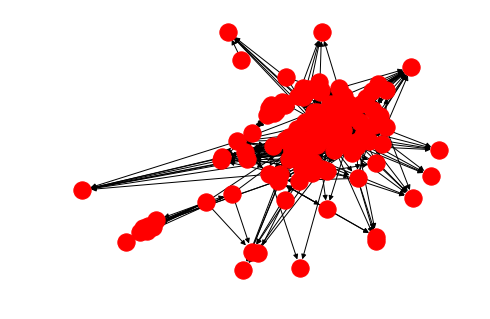

In [77]:
nx.draw(g)